In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib import animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
np.set_printoptions(threshold=np.nan)
import os
import seaborn as sns
np.random.seed(5761)

does not find industrial farm

import data

In [2]:
os.chdir('/Users/apple/Desktop/group/data');

In [3]:
Kenya_cattle_2006=pd.read_csv('crop_cattle_2006.txt', 
                       names = ["Long", "Lat", "Holding Number"], delim_whitespace=True)

In [4]:
Kenya_sheep_2006=pd.read_csv('crop_sheep_2006_2.txt', 
                       names = ["Long", "Lat", "Holding Number"], delim_whitespace=True)

In [5]:
Kenya_goat_2006=pd.read_csv('crop_goat_2006.txt', 
                       names = ["Long", "Lat", "Holding Number"], delim_whitespace=True)

In [6]:
Latitude_cattle=Kenya_cattle_2006["Lat"].values
Longtitude_cattle=Kenya_cattle_2006["Long"].values
Holding_number_cattle=Kenya_cattle_2006["Holding Number"].values

In [7]:
Latitude_sheep=Kenya_sheep_2006["Lat"].values
Longtitude_sheep=Kenya_sheep_2006["Long"].values
Holding_number_sheep=Kenya_sheep_2006["Holding Number"].values

In [8]:
Latitude_goat=Kenya_goat_2006["Lat"].values
Longtitude_goat=Kenya_goat_2006["Long"].values
Holding_number_goat=Kenya_goat_2006["Holding Number"].values

has checked grid are almost same  

In [9]:
Holding_number_ruminant=Holding_number_sheep+Holding_number_goat

heatmaps

In [10]:
a=Holding_number_cattle.reshape((67,93))

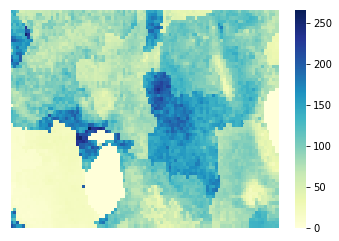

In [11]:
ax = sns.heatmap(a,cmap="YlGnBu",xticklabels=False,yticklabels=False)
plt.show()

In [12]:
np.mean(Holding_number_cattle)

87.444058700810075

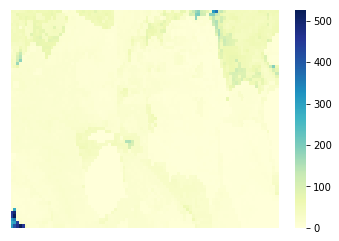

In [13]:
b=Holding_number_sheep.reshape((67,93))
bx = sns.heatmap(b,cmap="YlGnBu",xticklabels=False,yticklabels=False)
plt.show()

In [14]:
np.mean(Holding_number_sheep)

19.772703137053849

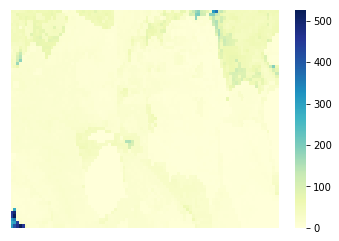

In [15]:
c=Holding_number_goat.reshape((67,93))
cx = sns.heatmap(c,cmap="YlGnBu",xticklabels=False,yticklabels=False)
plt.show()

In [16]:
np.mean(Holding_number_goat)

19.772703137053849

A suspicious point: goat and sheep data are same

In [17]:
np.mean(Holding_number_ruminant)

39.545406274107698

grids are equally spaced

In [18]:
b=list(set(Latitude_cattle))
b.sort()
del b[0]
b1=list(set(Latitude_cattle))
b1.sort()
del b[-1]
dist_lat=[x - y for x, y in zip(b, b1)]

c=list(set(Longtitude_cattle))
c.sort()
del c[0]
c1=list(set(Longtitude_cattle))
c1.sort()
del c1[-1]
dist_long=[x - y for x, y in zip(c, c1)]

dlat=np.mean(dist_lat)
print(np.var(dist_lat))
dlong=np.mean(dist_long)
print(np.var(dist_long))
dlat_half=dlat/2
dlong_half=dlong/2

2.01796717346e-33
5.1841135542e-29


Kenya data

In [19]:
Kenya=pd.read_csv("completeData2.csv")

In [20]:
cattle=Kenya['cattle'].values
ruminant=Kenya['sr'].values

In [21]:
np.mean(cattle)

9.8918128654970765

In [22]:
np.mean(ruminant)

4.3274853801169595

In [23]:
# for left bottom area, we impute a large farm 

In [24]:
large_farm_index=[i for i in range(len(Holding_number_ruminant)) if Holding_number_ruminant[i]>250]

In [25]:
# impute cattle

In [26]:
missing_farm_lat=list()
missing_farm_long=list()
missing_farm_grid=list()
missing_farm_hold_cattle=list()
missing_farm_hold_ruminant=list()

In [27]:
# check for one grid
for i in range(1):
    lat_i=Latitude_cattle[i]
    long_i=Longtitude_cattle[i]
    hold_cattle_i=round(Holding_number_cattle[i])    
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    while (True):
        impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
        impute_farm_long=np.random.uniform(long_lower,long_upper)
        impute_farm_hold_cattle=np.random.choice(cattle)       
        
        if hold_cattle_i>impute_farm_hold_cattle:
            missing_farm_lat.append(impute_farm_lat)
            missing_farm_long.append(impute_farm_long)
            missing_farm_hold_cattle.append(impute_farm_hold_cattle)
            missing_farm_grid.append(i)
            hold_cattle_i=hold_cattle_i-impute_farm_hold_cattle
        else:
            missing_farm_lat.append(impute_farm_lat)
            missing_farm_long.append(impute_farm_long)
            missing_farm_hold_cattle.append(int(hold_cattle_i))
            missing_farm_grid.append(i)
            break

In [28]:
missing_farm_hold_cattle

[8, 7, 2, 20, 13, 2, 56, 6, 0, 30]

In [29]:
missing_farm_grid

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
missing_farm_lat=list()
missing_farm_long=list()
missing_farm_grid=list()
missing_farm_hold_cattle=list()

In [31]:
N=len(Latitude_cattle)

In [32]:
for i in range(N):
    lat_i=Latitude_cattle[i]
    long_i=Longtitude_cattle[i]
    hold_cattle_i=round(Holding_number_cattle[i])    
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    if (int(hold_cattle_i)!=0):
        while (True):
            impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
            impute_farm_long=np.random.uniform(long_lower,long_upper)
            impute_farm_hold_cattle=np.random.choice(cattle)       
        
            if hold_cattle_i>impute_farm_hold_cattle:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_cattle.append(impute_farm_hold_cattle)
                missing_farm_grid.append(i)
                hold_cattle_i=hold_cattle_i-impute_farm_hold_cattle
            else:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_cattle.append(int(hold_cattle_i))
                missing_farm_grid.append(i)
                break

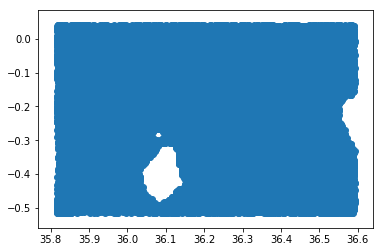

In [33]:
plt.scatter(missing_farm_long,missing_farm_lat)
plt.show()

In [34]:
len(missing_farm_lat)

65364

for ruminant data, some farms have great number of ruminants (over 1000) and others have small number of ruminents. To avoid imputing too much (over 200) farms for each grid, we use large farm size for this area (uniform number between 80 and 180).

add ruminants for existing farms and record ruminants left

In [35]:
missing_farm_hold_ruminant=np.zeros(len(missing_farm_hold_cattle))

In [36]:
remaining_ruminant_small_farm=list()
remaining_ruminant_grid_small_farm=list()
remaining_ruminant_large_farm=list()
remaining_ruminant_grid_large_farm=list()

In [37]:
index_large_farm=[i for i in range(len(Holding_number_ruminant)) if Holding_number_ruminant[i]>200]

In [38]:
index_small_farm=[i for i in range(len(Holding_number_ruminant)) if Holding_number_ruminant[i]<=200]

In [39]:
for i in index_small_farm:
    hold_ruminant_i=round(Holding_number_ruminant[i])
    grid_i_index=[j for j in range(len(missing_farm_grid)) if missing_farm_grid[j]==i]

    if (int(hold_ruminant_i)!=0): 
        while (len(grid_i_index)!=0 and (hold_ruminant_i!=0)):
            farm_index=random.sample(grid_i_index, 1)[0]
            grid_i_index.remove(farm_index)
            impute_farm_hold_ruminant=np.random.choice(ruminant) 
        
            if hold_ruminant_i>impute_farm_hold_ruminant:
                missing_farm_hold_ruminant[farm_index]=impute_farm_hold_ruminant
                hold_ruminant_i=hold_ruminant_i-impute_farm_hold_ruminant
            else:
                missing_farm_hold_ruminant[farm_index]=int(hold_ruminant_i)
                break
                
    remaining_ruminant_small_farm.append(hold_ruminant_i-sum(missing_farm_hold_ruminant[grid_i_index]))
    remaining_ruminant_grid_small_farm.append(i)

In [40]:
sum(np.asarray(remaining_ruminant_small_farm)==0)

392

In [41]:
for i in index_large_farm:
    hold_ruminant_i=round(Holding_number_ruminant[i])
    grid_i_index=[j for j in range(len(missing_farm_grid)) if missing_farm_grid[j]==i]
    
    if (int(hold_ruminant_i)!=0): 
        while (len(grid_i_index)!=0 and (hold_ruminant_i!=0)):
            farm_index=random.sample(grid_i_index, 1)[0]
            grid_i_index.remove(farm_index)
            impute_farm_hold_ruminant=np.random.randint(80,180)
        
            if hold_ruminant_i>impute_farm_hold_ruminant:
                missing_farm_hold_ruminant[farm_index]=impute_farm_hold_ruminant
                hold_ruminant_i=hold_ruminant_i-impute_farm_hold_ruminant
            else:
                missing_farm_hold_ruminant[farm_index]=int(hold_ruminant_i)
                break
    remaining_ruminant_large_farm.append(hold_ruminant_i-sum(missing_farm_hold_ruminant[grid_i_index]))
    remaining_ruminant_grid_large_farm.append(i)

In [42]:
missing_farm_hold_ruminant=list(missing_farm_hold_ruminant)

In [43]:
sum(np.asarray(remaining_ruminant_large_farm)==0)

0

impute remaining ruminants to new farms

In [44]:
for i in range(len(remaining_ruminant_grid_small_farm)):
    grid=remaining_ruminant_grid_small_farm[i]
    lat_i=Latitude_cattle[grid]
    long_i=Longtitude_cattle[grid]
    hold_ruminant_i=remaining_ruminant_small_farm[i]
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    if (int(hold_ruminant_i)!=0):
        while (True):
            impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
            impute_farm_long=np.random.uniform(long_lower,long_upper)
            impute_farm_hold_ruminant=np.random.choice(ruminant)       
        
            if hold_ruminant_i>impute_farm_hold_ruminant:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_ruminant.append(impute_farm_hold_ruminant)
                missing_farm_hold_cattle.append(0)
                missing_farm_grid.append(i)
                hold_ruminant_i=hold_ruminant_i-impute_farm_hold_ruminant
            else:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_ruminant.append(int(hold_ruminant_i))
                missing_farm_hold_cattle.append(0)
                missing_farm_grid.append(i)
                break

In [45]:
for i in range(len(remaining_ruminant_grid_large_farm)):
    grid=remaining_ruminant_grid_large_farm[i]
    lat_i=Latitude_cattle[grid]
    long_i=Longtitude_cattle[grid]
    hold_ruminant_i=remaining_ruminant_large_farm[i]
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    if (int(hold_ruminant_i)!=0):
        while (True):
            impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
            impute_farm_long=np.random.uniform(long_lower,long_upper)
            impute_farm_hold_ruminant=np.random.randint(80,180)      
        
            if hold_ruminant_i>impute_farm_hold_ruminant:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_ruminant.append(impute_farm_hold_ruminant)
                missing_farm_hold_cattle.append(0)
                missing_farm_grid.append(i)
                hold_ruminant_i=hold_ruminant_i-impute_farm_hold_ruminant
            else:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold_ruminant.append(int(hold_ruminant_i))
                missing_farm_hold_cattle.append(0)
                missing_farm_grid.append(i)
                break

In [46]:
len(missing_farm_lat)

107485

remove farms in the areas that we have data

In [47]:
latitude=Kenya["lat"].values
longtitude=Kenya["long"].values
cluster=Kenya["X__1"].values

In [48]:
cluster_unique=list(set(cluster))
N_cluster=len(cluster_unique)

In [49]:
# remove outliers in each cluster

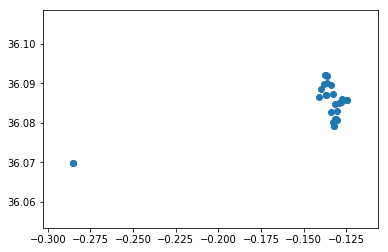

In [50]:
plt.scatter(latitude[cluster==cluster_unique[6]],longtitude[cluster==cluster_unique[6]])
plt.show()

In [51]:
index6=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[6] and latitude[i]<-0.2]
cluster[index6]='NA'

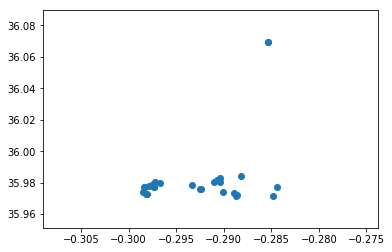

In [52]:
plt.scatter(latitude[cluster==cluster_unique[9]],longtitude[cluster==cluster_unique[9]])
plt.show()

In [53]:
index9=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[9] and longtitude[i]>36.04]
cluster[index9]='NA'

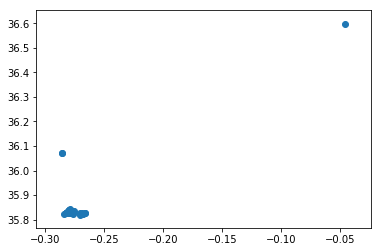

In [54]:
plt.scatter(latitude[cluster==cluster_unique[10]],longtitude[cluster==cluster_unique[10]])
plt.show()

In [55]:
index10=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[10] and longtitude[i]>35.9]
cluster[index10]='NA'

In [56]:
delete_index=list()
N_missing=len(missing_farm_lat)

In [57]:
for i in range(N_cluster):
    lat_ci=latitude[cluster==cluster_unique[i]]
    long_ci=longtitude[cluster==cluster_unique[i]]
    min_lat_ci=min(lat_ci)
    max_lat_ci=max(lat_ci)
    min_long_ci=min(long_ci)
    max_long_ci=max(long_ci)
    index=[k for k in range(N_missing) if (missing_farm_lat[k]<max_lat_ci) and (missing_farm_lat[k]>min_lat_ci) and (missing_farm_long[k]>min_long_ci) and (missing_farm_long[k]<max_long_ci)]
    delete_index.extend(index)   

In [58]:
delete_list_unique=list(set(delete_index))
print(len(delete_list_unique))

1068


In [59]:
delete_cattle=np.asarray(missing_farm_hold_cattle)[delete_list_unique]
delete_ruminant=np.asarray(missing_farm_hold_ruminant)[delete_list_unique]
delete_lat=np.asarray(missing_farm_lat)[delete_list_unique]
delete_long=np.asarray(missing_farm_long)[delete_list_unique]
delete_grid=np.asarray(missing_farm_grid)[delete_list_unique]

In [60]:
np.mean(delete_cattle)

4.2078651685393256

In [61]:
np.mean(delete_ruminant)

2.8876404494382024

In [62]:
for i in sorted(delete_list_unique, reverse=True):
    del missing_farm_lat[i]
    del missing_farm_long[i]
    del missing_farm_hold_ruminant[i]
    del missing_farm_hold_cattle[i]
    del missing_farm_grid[i]

In [63]:
zero_index=[i for i in range(len(missing_farm_lat)) if (missing_farm_hold_ruminant[i]==0) and (missing_farm_hold_cattle[i]==0)]

In [64]:
len(missing_farm_lat)

106417

In [65]:
# delete farms without cattles and ruminants

In [66]:
for i in sorted(zero_index, reverse=True):
    del missing_farm_lat[i]
    del missing_farm_long[i]
    del missing_farm_hold_ruminant[i]
    del missing_farm_hold_cattle[i]
    del missing_farm_grid[i]

In [67]:
len(missing_farm_lat)

85195

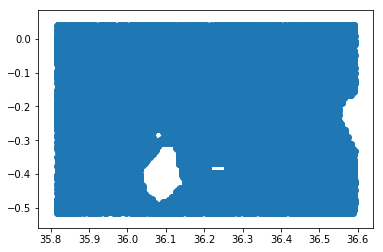

In [68]:
plt.scatter(missing_farm_long,missing_farm_lat)
#plt.scatter(longtitude,latitude)
plt.show()

In [69]:
# check the number of farms with only cattle and sheep

In [70]:
len([i for i in range(len(missing_farm_lat)) if (missing_farm_hold_ruminant[i]==0)])

38710

In [71]:
len([i for i in range(len(missing_farm_lat)) if (missing_farm_hold_cattle[i]==0)])

25522

In [72]:
len(missing_farm_lat)

85195

In [73]:
# check average number of cattles and sheeps for each farm

In [74]:
np.mean(missing_farm_hold_ruminant)

3.2597218146604847

In [75]:
np.mean(missing_farm_hold_cattle)

6.3426374787252771

In [76]:
# true data

In [77]:
len([i for i in range(len(cattle)) if (cattle[i]==0)])

27

In [78]:
len([i for i in range(len(cattle)) if (ruminant[i]==0)])

147

In [79]:
len(cattle)

342

In [80]:
np.mean(ruminant)

4.3274853801169595

In [81]:
np.mean(cattle)

9.8918128654970765

In [82]:
# impute other variables through knn

In [83]:
missing_farm_lat=np.asarray(missing_farm_lat)
missing_farm_long=np.asarray(missing_farm_long)
missing_farm_hold_ruminant=np.asarray(missing_farm_hold_ruminant)
missing_farm_hold_cattle=np.asarray(missing_farm_hold_cattle)
missing_farm_grid=np.asarray(missing_farm_grid)

In [84]:
missing_farm_lat_scale = (missing_farm_lat-min(missing_farm_lat))/(max(missing_farm_lat)-min(missing_farm_lat))
missing_farm_long_scale = (missing_farm_long-min(missing_farm_long))/(max(missing_farm_long)-min(missing_farm_long))
missing_farm_hold_ruminant_scale = (missing_farm_hold_ruminant-min(missing_farm_hold_ruminant))/(max(missing_farm_hold_ruminant)-min(missing_farm_hold_ruminant))
missing_farm_hold_cattle_scale = (missing_farm_hold_cattle-min(missing_farm_hold_cattle))/(max(missing_farm_hold_cattle)-min(missing_farm_hold_cattle))

In [85]:
X_test=np.column_stack((missing_farm_lat_scale,missing_farm_long_scale,missing_farm_hold_ruminant_scale,missing_farm_hold_cattle_scale))

In [86]:
latitude_scale=(latitude-min(latitude))/(max(latitude)-min(latitude))
longtitude_scale=(longtitude-min(longtitude))/(max(longtitude)-min(longtitude))
ruminant_scale=(ruminant-min(ruminant))/(max(ruminant)-min(ruminant))
cattle_scale=(cattle-min(cattle))/(max(cattle)-min(cattle))

In [87]:
X_train=np.column_stack((latitude_scale,longtitude_scale,ruminant_scale,cattle_scale))

In [88]:
fmd=Kenya['fmd'].values
vaccine=Kenya['vaccine'].values
water_grazing=Kenya['water_grazing'].values
milk=Kenya['milk'].values
equipment=Kenya['equipment'].values
vet=Kenya['vet'].values
contact_animal=Kenya['contact_animal'].values
contact_people=Kenya['contact_people'].values
grazing=Kenya['grazing'].values
water=Kenya['water'].values

In [89]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
myList = list(range(1,200))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, fmd, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The optimal number of neighbors is 51


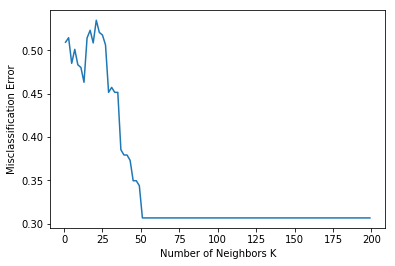

In [90]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [91]:
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(X_train, fmd) 
fmd_predict=knn.predict(X_test)

The optimal number of neighbors is 79


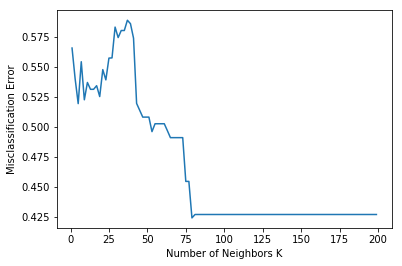

In [92]:
# creating odd list of K for KNN
myList = list(range(1,200))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, vaccine, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [93]:
knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_train, vaccine) 
vaccine_predict=knn.predict(X_test)

The optimal number of neighbors is 41


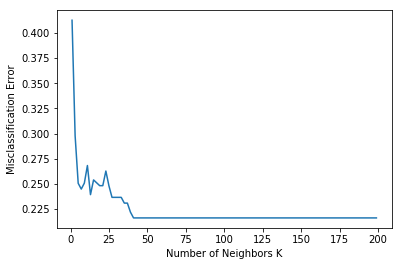

In [94]:
# creating odd list of K for KNN
myList = list(range(1,200))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, milk, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [95]:
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train, milk) 
milk_predict=knn.predict(X_test)

The optimal number of neighbors is 251


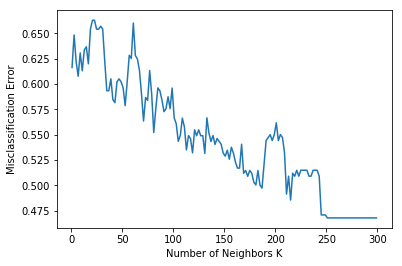

In [96]:
# creating odd list of K for KNN
myList = list(range(1,300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, equipment, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [97]:
knn = KNeighborsClassifier(n_neighbors=251)
knn.fit(X_train, equipment) 
equipment_predict=knn.predict(X_test)

The optimal number of neighbors is 13


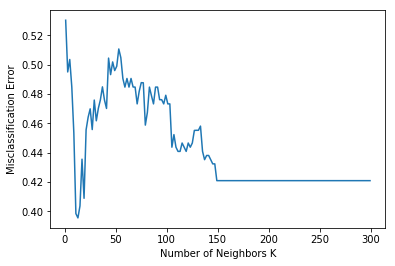

In [98]:
# creating odd list of K for KNN
myList = list(range(1,300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, vet, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

k may not be the best for test data

In [99]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, vet) 
vet_predict=knn.predict(X_test)

The optimal number of neighbors is 59


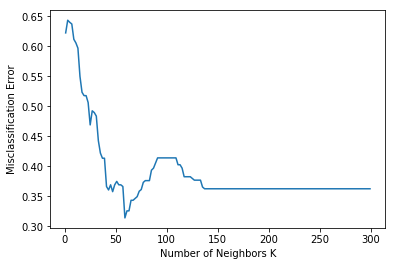

In [100]:
# creating odd list of K for KNN
myList = list(range(1,300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, contact_people, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

k may not be the best for test data

In [101]:
knn = KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train, contact_people) 
contact_people_predict=knn.predict(X_test)

The optimal number of neighbors is 23


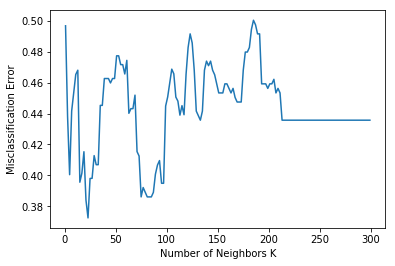

In [102]:
# creating odd list of K for KNN
myList = list(range(1,300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, contact_animal, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

k may not be the best for test data

In [103]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, contact_animal) 
contact_animal_predict=knn.predict(X_test)

The optimal number of neighbors is 95


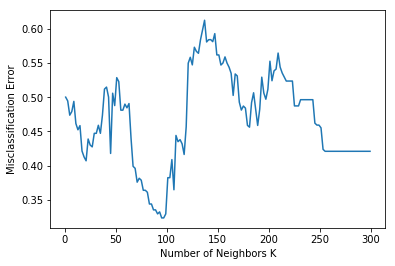

In [104]:
# creating odd list of K for KNN
myList = list(range(1,300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, grazing, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

k may not be the best for test data

In [105]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(X_train, grazing) 
grazing_predict=knn.predict(X_test)

The optimal number of neighbors is 37


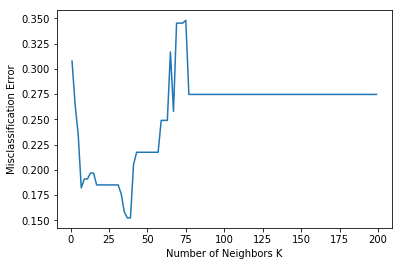

In [106]:
# creating odd list of K for KNN
myList = list(range(1,200))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, water, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

k may not be the best for test data

In [107]:
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, water) 
water_predict=knn.predict(X_test)

In [108]:
df = pd.DataFrame({'lat':missing_farm_lat,'long':missing_farm_long,'cattle':missing_farm_hold_cattle,'ruminant':missing_farm_hold_ruminant})

In [109]:
df

,cattle,lat,long,ruminant
0,6,0.041087,35.819054,10.0
1,0,0.034595,35.821998,4.0
2,36,0.034986,35.822708,6.0
3,2,0.039033,35.818515,0.0
4,7,0.039823,35.817192,2.0
5,17,0.039945,35.820260,0.0
6,4,0.039550,35.820337,1.0
7,1,0.041387,35.822087,0.0
8,8,0.040411,35.822168,1.0
9,2,0.037195,35.821114,1.0


In [110]:
df['fmd'] = pd.Series(fmd_predict, index=df.index)

In [111]:
df['vaccine'] = pd.Series(vaccine_predict, index=df.index)

In [112]:
df['milk'] = pd.Series(milk_predict, index=df.index)

In [113]:
df['equipment'] = pd.Series(equipment_predict, index=df.index)

In [114]:
df['vet'] = pd.Series(vet_predict, index=df.index)

In [115]:
df['contact_animal'] = pd.Series(contact_animal_predict, index=df.index)

In [116]:
df['contact_people'] = pd.Series(contact_people_predict, index=df.index)

In [117]:
df['water'] = pd.Series(water_predict, index=df.index)

In [118]:
df['grazing'] = pd.Series(grazing_predict, index=df.index)

In [119]:
df

,cattle,lat,long,ruminant,fmd,vaccine,milk,equipment,vet,contact_animal,contact_people,water,grazing
0,6,0.041087,35.819054,10.0,0,1,1,0,0,1,0,0,1
1,0,0.034595,35.821998,4.0,0,1,1,0,0,1,0,0,1
2,36,0.034986,35.822708,6.0,0,1,1,0,0,1,0,0,1
3,2,0.039033,35.818515,0.0,0,1,1,0,0,1,0,0,1
4,7,0.039823,35.817192,2.0,0,1,1,0,0,1,0,0,1
5,17,0.039945,35.820260,0.0,0,1,1,0,0,1,0,0,1
6,4,0.039550,35.820337,1.0,0,1,1,0,0,1,0,0,1
7,1,0.041387,35.822087,0.0,0,1,1,0,0,1,0,0,1
8,8,0.040411,35.822168,1.0,0,1,1,0,0,1,0,0,1
9,2,0.037195,35.821114,1.0,0,1,1,0,0,1,0,0,1


In [120]:
#df.to_csv('imputed_farm', sep='\t', encoding='utf-8')

In [121]:
#readdata=pd.read_csv('imputed_farm', delim_whitespace=True)

In [122]:
#readdata

In [123]:
# only keep 342/1068 data as we overestimate the farm number by comparing with Kenta data

In [124]:
keep_farm=list()

In [125]:
for i in list(set(missing_farm_grid)):
    index_grid_i=np.asarray([j for j in range(len(missing_farm_lat)) if missing_farm_grid[j]==i])
    keep_num=int(round(1.0*len(index_grid_i)*342/1068))
    keep_farm_i=np.random.choice(index_grid_i,keep_num,replace=False)
    keep_farm.extend(keep_farm_i)

In [126]:
df2=df.iloc[keep_farm]

In [127]:
df2

,cattle,lat,long,ruminant,fmd,vaccine,milk,equipment,vet,contact_animal,contact_people,water,grazing
61407,0,0.035025,35.819964,5.0,0,1,1,0,0,1,0,0,1
0,6,0.041087,35.819054,10.0,0,1,1,0,0,1,0,0,1
61409,0,0.038140,35.817722,8.0,0,1,1,0,0,1,0,0,1
12,38,0.039489,35.820858,5.0,0,1,1,0,0,1,0,0,1
61421,0,0.039378,35.818772,2.0,0,1,1,0,0,1,0,0,1
61410,0,0.038309,35.817962,2.0,0,1,1,0,0,1,0,0,1
10,10,0.040617,35.819576,0.0,0,1,1,0,0,1,0,0,1
61416,0,0.038699,35.820077,4.0,0,1,1,0,0,1,0,0,1
8,8,0.040411,35.822168,1.0,0,1,1,0,0,1,0,0,1
61412,0,0.038432,35.817409,2.0,0,1,1,0,0,1,0,0,1


In [128]:
df2.to_csv('imputed_farm_reducedsize', sep='\t', encoding='utf-8')

In [129]:
np.mean(df2['cattle'])

6.311520433572579

In [130]:
np.mean(df2['ruminant'])

3.264098432693716

In [131]:
np.mean(cattle)

9.8918128654970765

In [132]:
np.mean(ruminant)

4.3274853801169595

1. comparison between true data and imputed data 
2. comparison between imputed data and livestock map 

this is an incomplete version.
(I'll do more if we want to put it in final report)


In [133]:
heatmap_true_cluster_cattle=list()
heatmap_true_cluster_ruminant=list()

In [134]:
for i in range(len(Latitude_cattle)):
    farm_index_grid_cluster_i=[j for j in range(len(latitude)) if (latitude[j]<Latitude_cattle[i]+dlat_half) and (latitude[j]>Latitude_cattle[i]-dlat_half) and (longtitude[j]<Longtitude_cattle[i]+dlong_half) and (longtitude[j]>Longtitude_cattle[i]-dlong_half)]
    heatmap_true_cluster_cattle.append(sum(cattle[farm_index_grid_cluster_i]))
    heatmap_true_cluster_ruminant.append(sum(ruminant[farm_index_grid_cluster_i]))

In [135]:
# keep only 342/1068 cluste data
keep_farm_cluster=list()

In [136]:
for i in list(set(delete_grid)):
    index_grid_i=np.asarray([j for j in range(len(delete_lat)) if delete_grid[j]==i])
    keep_num=int(round(1.0*len(index_grid_i)*342/1068))
    keep_farm_cluster_i=np.random.choice(index_grid_i,keep_num,replace=False)
    keep_farm_cluster.extend(keep_farm_cluster_i)

In [137]:
cluster_lat=delete_lat[keep_farm_cluster]
cluster_long=delete_long[keep_farm_cluster]
cluster_cattle=delete_cattle[keep_farm_cluster]
cluster_ruminant=delete_ruminant[keep_farm_cluster]

In [138]:
heatmap_impute_cluster_reducedsize_cattle=list()
heatmap_impute_cluster_reducedsize_ruminant=list()

In [139]:
for i in range(len(Latitude_cattle)):
    farm_index_grid_cluster_i=[j for j in range(len(cluster_lat)) if (cluster_lat[j]<Latitude_cattle[i]+dlat_half) and (cluster_lat[j]>Latitude_cattle[i]-dlat_half) and (cluster_long[j]<Longtitude_cattle[i]+dlong_half) and (cluster_long[j]>Longtitude_cattle[i]-dlong_half)]
    heatmap_impute_cluster_reducedsize_cattle.append(sum(cluster_cattle[farm_index_grid_cluster_i]))
    heatmap_impute_cluster_reducedsize_ruminant.append(sum(cluster_ruminant[farm_index_grid_cluster_i]))

In [140]:
heatmap_impute_cluster_cattle=list()
heatmap_impute_cluster_ruminant=list()

In [141]:
for i in range(len(Latitude_cattle)):
    farm_index_grid_cluster_i=[j for j in range(len(delete_lat)) if (delete_lat[j]<Latitude_cattle[i]+dlat_half) and (delete_lat[j]>Latitude_cattle[i]-dlat_half) and (delete_long[j]<Longtitude_cattle[i]+dlong_half) and (delete_long[j]>Longtitude_cattle[i]-dlong_half)]
    heatmap_impute_cluster_cattle.append(sum(delete_cattle[farm_index_grid_cluster_i]))
    heatmap_impute_cluster_ruminant.append(sum(delete_ruminant[farm_index_grid_cluster_i]))

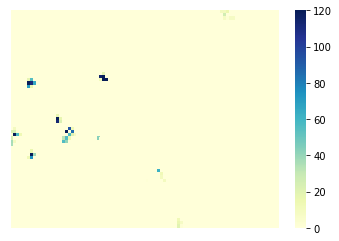

In [142]:
d=np.asarray(heatmap_true_cluster_cattle).reshape((67,93))
ax = sns.heatmap(d,xticklabels=False,yticklabels=False,vmax=120,cmap="YlGnBu")
plt.show()

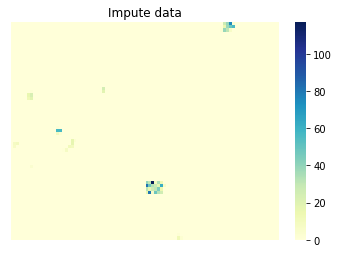

In [143]:
e=np.asarray(heatmap_impute_cluster_reducedsize_cattle).reshape((67,93))
ax = sns.heatmap(e,xticklabels=False,yticklabels=False,cmap="YlGnBu")
plt.title('Impute data')
plt.show()

In [144]:
heatmap_impute_noncluster_cattle=list()
heatmap_impute_noncluster_ruminant=list()

In [145]:
for i in range(len(Latitude_cattle)):
    farm_index_grid_cluster_i=[j for j in range(len(missing_farm_lat)) if (missing_farm_lat[j]<Latitude_cattle[i]+dlat_half) and (missing_farm_lat[j]>Latitude_cattle[i]-dlat_half) and (missing_farm_long[j]<Longtitude_cattle[i]+dlong_half) and (missing_farm_long[j]>Longtitude_cattle[i]-dlong_half)]
    heatmap_impute_noncluster_cattle.append(sum(missing_farm_hold_cattle[farm_index_grid_cluster_i]))
    heatmap_impute_noncluster_ruminant.append(sum(missing_farm_hold_ruminant[farm_index_grid_cluster_i]))

In [146]:
heatmap_impute_cattle=np.asarray(heatmap_impute_noncluster_cattle)+np.asarray(heatmap_impute_cluster_cattle)
heatmap_impute_ruminant=np.asarray(heatmap_impute_noncluster_ruminant)+np.asarray(heatmap_impute_cluster_ruminant)

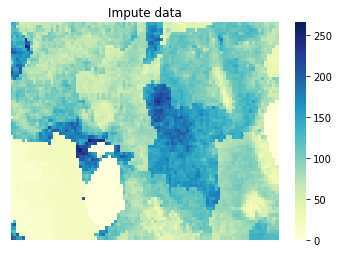

In [147]:
f=np.asarray(heatmap_impute_cattle).reshape((67,93))
ax = sns.heatmap(f,xticklabels=False,yticklabels=False,cmap="YlGnBu")
plt.title('Impute data')
plt.show()

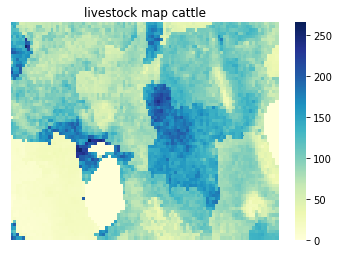

In [148]:
ax = sns.heatmap(a,xticklabels=False,yticklabels=False,cmap="YlGnBu")
plt.title('livestock map cattle')
plt.show()

In [149]:
heatmap_impute_noncluster_reducedsize_cattle=list()
heatmap_impute_noncluster_reducedsize_ruminant=list()

In [150]:
missing_farm_reducedsize_lat=df2['lat'].values
missing_farm_reducedsize_long=df2['long'].values
missing_farm_reducedsize_hold_cattle=df2['cattle'].values
missing_farm_reducedsize_hold_ruminant=df2['ruminant'].values

In [151]:
for i in range(len(Latitude_cattle)):
    farm_index_grid_cluster_i=[j for j in range(len(missing_farm_reducedsize_lat)) if (missing_farm_reducedsize_lat[j]<Latitude_cattle[i]+dlat_half) and (missing_farm_reducedsize_lat[j]>Latitude_cattle[i]-dlat_half) and (missing_farm_reducedsize_long[j]<Longtitude_cattle[i]+dlong_half) and (missing_farm_reducedsize_long[j]>Longtitude_cattle[i]-dlong_half)]
    heatmap_impute_noncluster_reducedsize_cattle.append(sum(missing_farm_reducedsize_hold_cattle[farm_index_grid_cluster_i]))
    heatmap_impute_noncluster_reducedsize_ruminant.append(sum(missing_farm_reducedsize_hold_ruminant[farm_index_grid_cluster_i]))

In [152]:
heatmap_impute_reducedsize_cattle=np.asarray(heatmap_impute_noncluster_reducedsize_cattle)+np.asarray(heatmap_impute_cluster_reducedsize_cattle)
heatmap_impute_reducedsize_ruminant=np.asarray(heatmap_impute_noncluster_reducedsize_ruminant)+np.asarray(heatmap_impute_cluster_reducedsize_ruminant)

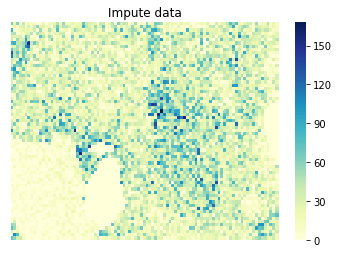

In [154]:
g=np.asarray(heatmap_impute_reducedsize_cattle).reshape((67,93))
ax = sns.heatmap(g,xticklabels=False,yticklabels=False,cmap="YlGnBu")
plt.title('Impute data')
plt.show()